Loading Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

The data provided for my analysis consisted of four files: Two files in csv format and two files in parquet format. The csv files contained textual data such as pizza_type_id, name, category, and ingredients. The second csv file contained data: pizza_id, pizza_type_id, size, and price. As we can see, they shared a common column: pizza_type_id. So, I decided to merge these two files using the merge function. My next step was to also merge the parquet files based on common columns. These actions allowed me to work with a single dataframe that contained all the columns with different pieces of information. This made data processing easier and improved code readability

In [2]:
df1 = pd.read_csv('pizza_types.csv')
df2 = pd.read_csv('pizzas.csv')

pizza_merged = df1.merge(df2, on='pizza_type_id')

order_details=pd.read_parquet('order_details.parquet')

orders = pd.read_parquet('orders.parquet')

order_merged = order_details.merge(orders, on='order_id')

data_merged = pizza_merged.merge(order_merged, on='pizza_id')

data_merged.set_index('order_id')

# data_merged.to_csv('Analiza_pizzy.csv', index=False)
#print(order_details.head(10))

,pizza_type_id,name,category,ingredients,pizza_id,size,price,order_details_id,quantity,date,time
order_id,,,,,,,,,,,
6,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,S,12.75,11,1,2015-01-01,12:29:36
102,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,S,12.75,239,1,2015-01-02,17:54:04
124,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,S,12.75,294,1,2015-01-02,20:12:34
194,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,S,12.75,458,1,2015-01-03,21:21:24
208,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,S,12.75,489,1,2015-01-04,12:12:05
...,...,...,...,...,...,...,...,...,...,...,...
21230,veggie_veg,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",veggie_veg_l,L,20.25,48341,1,2015-12-29,14:43:26
21278,veggie_veg,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",veggie_veg_l,L,20.25,48452,1,2015-12-31,11:22:31
21305,veggie_veg,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",veggie_veg_l,L,20.25,48523,1,2015-12-31,16:31:16


# What is the total revenue for the year?

In [3]:
total_revenue = (data_merged["price"] * data_merged["quantity"]).sum()

print("Total revenue: ${:.2f}".format(total_revenue))

Total revenue: $817860.05


# How many orders were placed in the year?
# How many pizzas were sold in the year?
# How many orders were placed in each month?
# How many pizzas were sold in each month?

The number of orders in the year:  48620
The number of pizzas sold throughout the year:  49574
The number of orders in each month: 
        date  order_count
0   2015-01         4156
1   2015-02         3892
2   2015-03         4186
3   2015-04         4067
4   2015-05         4239
5   2015-06         4025
6   2015-07         4301
7   2015-08         4094
8   2015-09         3819
9   2015-10         3797
10  2015-11         4185
11  2015-12         3859
The number of pizzas sold in each month in descending order:
        date  quantity
0   2015-01      4232
1   2015-02      3961
2   2015-03      4261
3   2015-04      4151
4   2015-05      4328
5   2015-06      4107
6   2015-07      4392
7   2015-08      4168
8   2015-09      3890
9   2015-10      3883
10  2015-11      4266
11  2015-12      3935


<Figure size 1000x600 with 0 Axes>

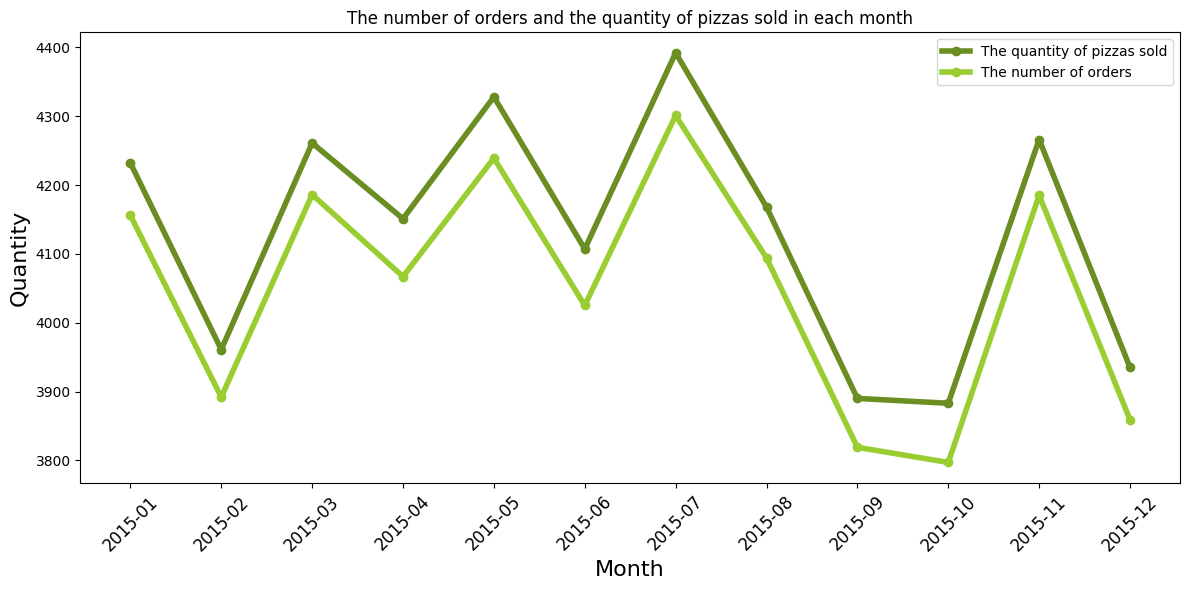

In [4]:
ilosc_zamowien = len(data_merged)
print("The number of orders in the year: ", ilosc_zamowien)

suma_zamowionych_pizz = data_merged['quantity'].sum()
print("The number of pizzas sold throughout the year: ", suma_zamowionych_pizz)

data_merged['date'] = pd.to_datetime(data_merged['date'])

monthly_orders = data_merged.groupby(data_merged['date'].dt.to_period('M')).size().reset_index(name='order_count')
print("The number of orders in each month: \n", monthly_orders)

plt.figure(figsize=(10, 6))
monthly_orders['date'] = monthly_orders['date'].dt.to_timestamp()
monthly_orders['date'] = monthly_orders['date'].dt.strftime('%Y-%m')

dates = monthly_orders['date']
order_counts = monthly_orders['order_count']

monthly_sales = data_merged.groupby(data_merged['date'].dt.to_period('M'))['quantity'].sum().reset_index()

monthly_sales['date'] = monthly_sales['date'].dt.strftime('%Y-%m')
dates = monthly_sales['date']
pizza_counts = monthly_sales['quantity']

print('The number of pizzas sold in each month in descending order:\n', monthly_sales)

data_merged['date'] = pd.to_datetime(data_merged['date'])

monthly_orders = data_merged.groupby(data_merged['date'].dt.to_period('M')).agg({'quantity': 'sum', 'order_details_id': 'count'}).reset_index()
monthly_orders.rename(columns={'order_details_id': 'order_count'}, inplace=True)

monthly_orders['date'] = monthly_orders['date'].dt.strftime('%Y-%m')
dates = monthly_orders['date']
order_counts = monthly_orders['order_count']
pizza_counts = monthly_orders['quantity']

plt.figure(figsize=(12, 6))
plt.plot(dates, pizza_counts, marker='o', color='olivedrab', linestyle='-', linewidth=4, label='The quantity of pizzas sold')
plt.plot(dates, order_counts, marker='o', color='yellowgreen', linestyle='-', linewidth=4, label='The number of orders')
plt.xlabel('Month', fontsize=16)
plt.ylabel('Quantity', fontsize=16)
plt.title('The number of orders and the quantity of pizzas sold in each month', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


#How many pizzas were ordered in each season of the year?

The number of pizzas sold in the spring season: 12708
The number of pizzas sold in the summer season: 13101
The number of pizzas sold in the autumn season: 11885
The number of pizzas sold in the winter season: 11880


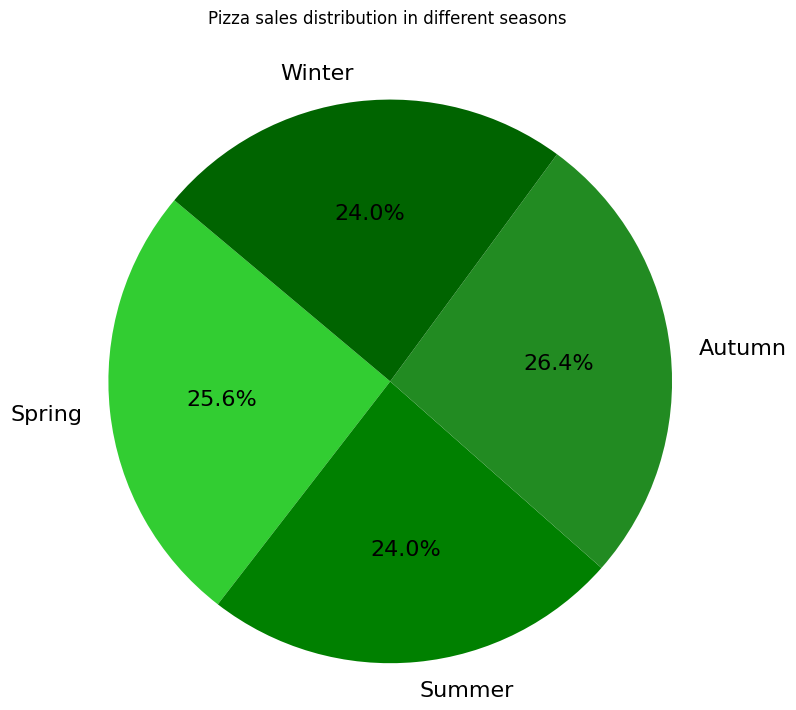

In [5]:
wiosna_start = pd.Timestamp('2015-03-21')
wiosna_end = pd.Timestamp('2015-06-20')

pizze_wiosna = data_merged[(data_merged['date'] >= wiosna_start) & (data_merged['date'] <= wiosna_end)]
ilosc_pizz_wiosna = pizze_wiosna['quantity'].sum()
print("The number of pizzas sold in the spring season:", ilosc_pizz_wiosna)

lato_start = pd.Timestamp('2015-06-21')
lato_end = pd.Timestamp('2015-09-23')

pizze_lato = data_merged[(data_merged['date'] >= lato_start) & (data_merged['date'] <= lato_end)]
ilosc_pizz_lato = pizze_lato['quantity'].sum()
print("The number of pizzas sold in the summer season:", ilosc_pizz_lato)

jesien_start = pd.Timestamp('2015-09-24')
jesien_end = pd.Timestamp('2015-12-22')

pizze_jesien = data_merged[(data_merged['date'] >= jesien_start) & (data_merged['date'] <= jesien_end)]
ilosc_pizz_jesien = pizze_jesien['quantity'].sum()
print("The number of pizzas sold in the autumn season:", ilosc_pizz_jesien)

zima_start = pd.Timestamp('2015-01-01')
zima_end = pd.Timestamp('2015-03-20')
zima_koniec = pd.Timestamp('2015-12-23')
zima_koniec2 = pd.Timestamp('2015-12-31')

pizze_zima = data_merged[((data_merged['date'] >= zima_start) & (data_merged['date'] <= zima_end)) | ((data_merged['date'] >= zima_koniec) & (data_merged['date'] <=zima_koniec2))]
ilosc_pizz_zima = pizze_zima['quantity'].sum()
print("The number of pizzas sold in the winter season:", ilosc_pizz_zima)


labels = ['Spring', 'Summer', 'Autumn', 'Winter']
sizes = [ilosc_pizz_wiosna, ilosc_pizz_zima, ilosc_pizz_lato, ilosc_pizz_jesien]
colors = ['limegreen', 'green', 'forestgreen', 'darkgreen']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 16})
plt.axis('equal')

plt.title('Pizza sales distribution in different seasons \n \n')
plt.show()

# Is there a correlation between the number of pizzas sold and the season of the year?


In [6]:
grupy = [pizze_wiosna['quantity'], pizze_lato['quantity'], pizze_jesien['quantity'], pizze_zima['quantity']]

statistic, p_value = stats.f_oneway(*grupy)

print("Analysis of Variance (ANOVA) statistic:", statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("There are significant differences between the seasons and the quantity of pizzas sold (p < 0.05)")
else:
    print("There are no significant differences between the seasons and the quantity of pizzas sold (p >= 0.05)")


Analysis of Variance (ANOVA) statistic: 0.06254899871251213
p-value: 0.9795581739179321
There are no significant differences between the seasons and the quantity of pizzas sold (p >= 0.05)


This means that based on the available data, we cannot conclude that the season significantly influences the quantity of pizzas sold. It may suggest that the pizzeria maintains a consistent level of sales throughout the year, regardless of the season.

#How many pizzas were ordered from each category? (Taking quantity into account)

The number of pizzas from each category: 
   category  quantity
0  Chicken     11050
1  Classic     14888
2  Supreme     11987
3   Veggie     11649


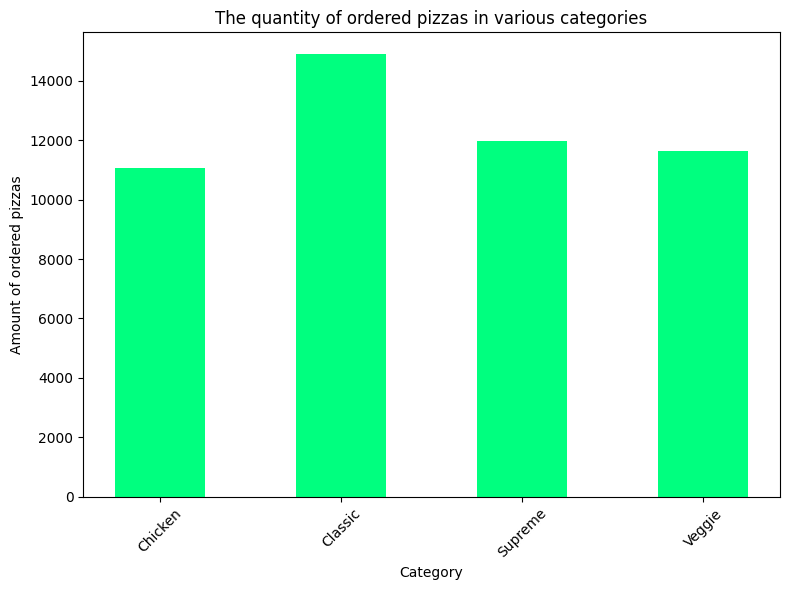

In [7]:
category_counts = data_merged.groupby('category')['quantity'].sum().reset_index()

print("The number of pizzas from each category: \n", category_counts)
plt.figure(figsize=(8, 6))
plt.bar(category_counts['category'], category_counts['quantity'], color='springgreen', width=0.5)
plt.xlabel('Category')
plt.ylabel('Amount of ordered pizzas')
plt.title('The quantity of ordered pizzas in various categories')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#How many times each pizza has been repeated in each size within each category?

In [8]:
zliczone_pizze = data_merged.groupby(['category', 'name', 'size'])['quantity'].sum().reset_index()

print(zliczone_pizze)

   category                               name size  quantity
0   Chicken         The Barbecue Chicken Pizza    L       992
1   Chicken         The Barbecue Chicken Pizza    M       956
2   Chicken         The Barbecue Chicken Pizza    S       484
3   Chicken       The California Chicken Pizza    L       927
4   Chicken       The California Chicken Pizza    M       944
..      ...                                ...  ...       ...
86   Veggie         The Spinach and Feta Pizza    M       562
87   Veggie         The Spinach and Feta Pizza    S       439
88   Veggie  The Vegetables + Vegetables Pizza    L       427
89   Veggie  The Vegetables + Vegetables Pizza    M       635
90   Veggie  The Vegetables + Vegetables Pizza    S       464

[91 rows x 4 columns]


#The number of pizzas ordered in different categories and sizes

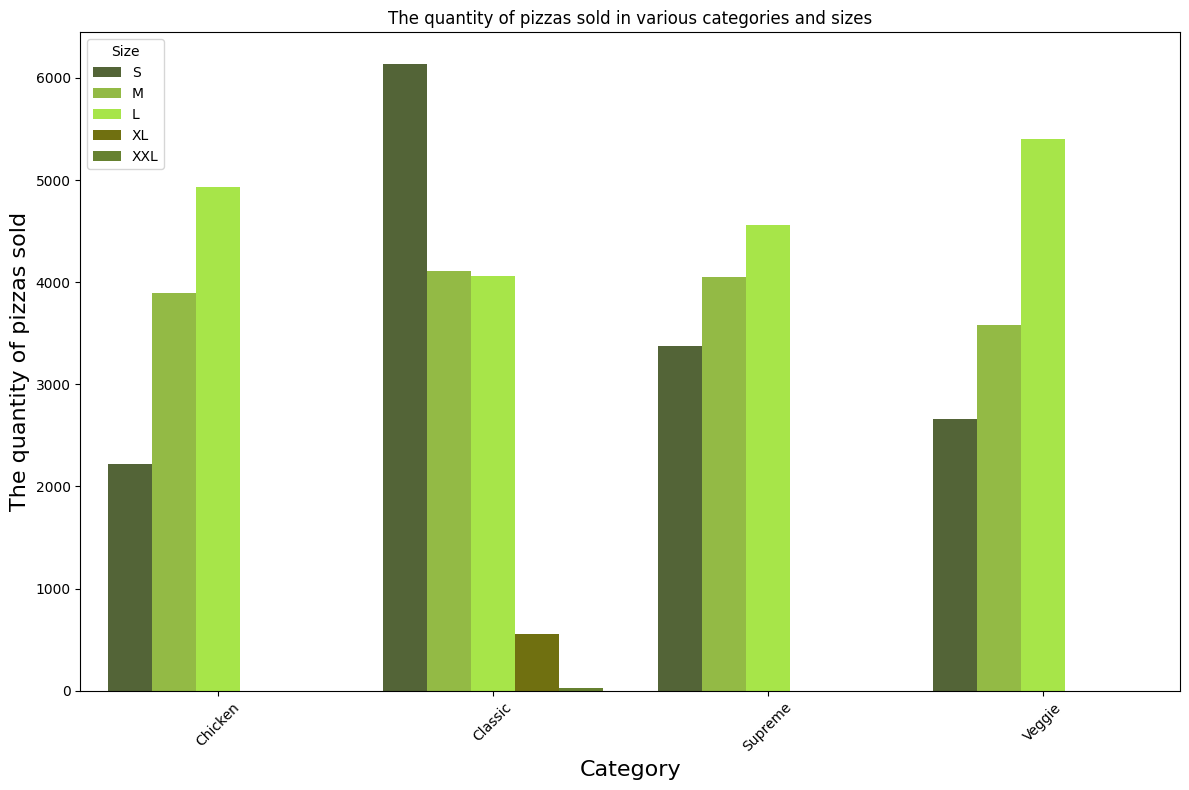

In [9]:
category_size_counts = data_merged.groupby(['category', 'size'])['quantity'].sum().reset_index()

desired_size_order = ['S', 'M', 'L', 'XL', 'XXL']

color_list = ["darkolivegreen", "yellowgreen", "greenyellow", "olive", "olivedrab"]

plt.figure(figsize=(12, 8))

sns.barplot(data=category_size_counts, x='category', y='quantity', hue='size', palette=color_list, hue_order=desired_size_order)
plt.xlabel('Category', fontsize=16)
plt.ylabel('The quantity of pizzas sold', fontsize=16)
plt.title('The quantity of pizzas sold in various categories and sizes')
plt.xticks(rotation=45)
plt.legend(title='Size')
plt.tight_layout()
plt.show()

#What sizes of pizza are usually ordered?

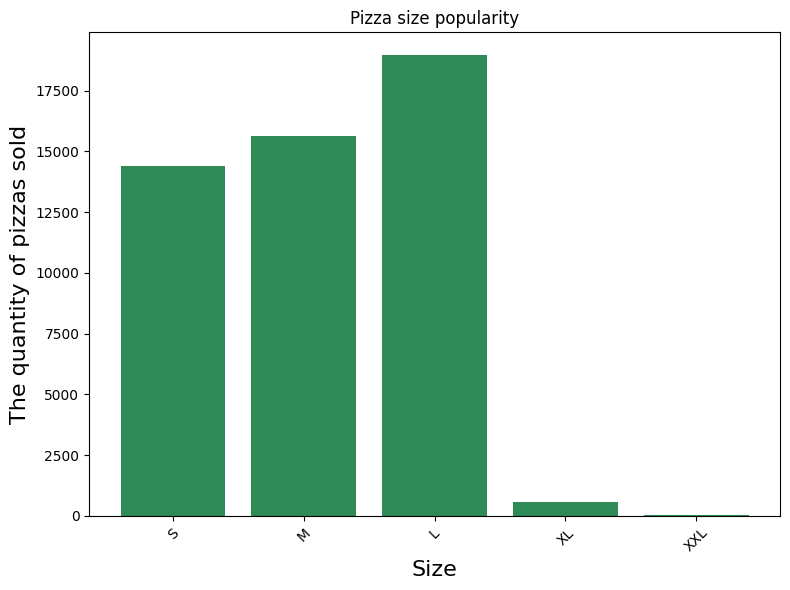

In [10]:
size_counts = data_merged.groupby('size')['quantity'].sum().reset_index()
size_counts['size'] = pd.Categorical(size_counts['size'], categories=['S', 'M', 'L', 'XL', 'XXL'], ordered=True)
size_counts = size_counts.sort_values('size')

plt.figure(figsize=(8, 6))
plt.bar(size_counts['size'], size_counts['quantity'], color='seagreen')
plt.xlabel('Size', fontsize=16)
plt.ylabel('The quantity of pizzas sold', fontsize=16)
plt.title('Pizza size popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Which pizza, in what size, was sold most frequently?

In [11]:
zliczone_pizze = data_merged.groupby(['category', 'name', 'size'])['quantity'].sum().reset_index()

najczesciej_kupowane_pizze = zliczone_pizze.sort_values(by='quantity', ascending=False).head(8)

print("The 8 most frequently purchased pizzas are:")
for index, pizza in najczesciej_kupowane_pizze.iterrows():
    print("Category:", pizza['category'])
    print("Name:", pizza['name'])
    print("Size:", pizza['size'])
    print("Quantity", pizza['quantity'])
    print()


The 8 most frequently purchased pizzas are:
Category: Classic
Name: The Big Meat Pizza
Size: S
Quantity 1914

Category: Chicken
Name: The Thai Chicken Pizza
Size: L
Quantity 1410

Category: Veggie
Name: The Five Cheese Pizza
Size: L
Quantity 1409

Category: Veggie
Name: The Four Cheese Pizza
Size: L
Quantity 1316

Category: Classic
Name: The Classic Deluxe Pizza
Size: M
Quantity 1181

Category: Supreme
Name: The Spicy Italian Pizza
Size: L
Quantity 1109

Category: Classic
Name: The Hawaiian Pizza
Size: S
Quantity 1020

Category: Chicken
Name: The Southwest Chicken Pizza
Size: L
Quantity 1016



# How does it look when breaking down the data by month?

size        L     M     S  XL  XXL
date                              
2015-01  1640  1311  1229  50    2
2015-02  1521  1210  1189  38    3
2015-03  1651  1313  1253  41    3
2015-04  1541  1390  1151  65    4
2015-05  1668  1338  1265  54    3
2015-06  1590  1335  1131  49    2
2015-07  1697  1396  1249  50    0
2015-08  1527  1331  1264  44    2
2015-09  1511  1188  1152  36    3
2015-10  1485  1253  1101  42    2
2015-11  1623  1337  1258  45    3
2015-12  1502  1233  1161  38    1


<Figure size 1200x1000 with 0 Axes>

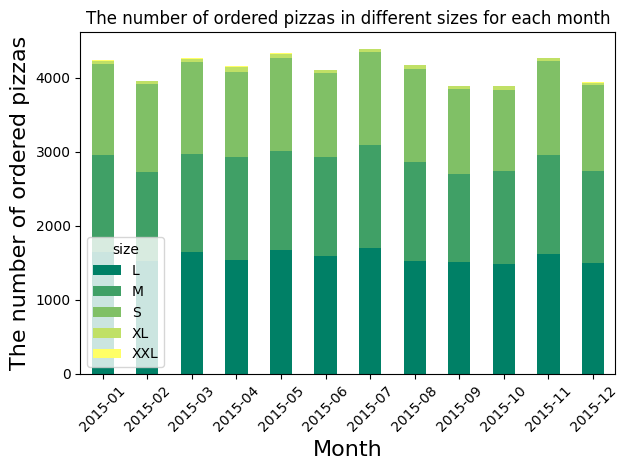

In [13]:
data_merged['date'] = pd.to_datetime(data_merged['date'])

monthly_size_counts = data_merged.groupby([data_merged['date'].dt.to_period('M'), 'size'])['quantity'].sum().reset_index()

monthly_size_counts = monthly_size_counts.pivot(index='date', columns='size', values='quantity').fillna(0)

monthly_size_counts = monthly_size_counts.astype(int)

print(monthly_size_counts)

plt.figure(figsize=(12, 10))
monthly_size_counts.plot(kind='bar', stacked=True, colormap='summer', legend=True)
plt.xlabel('Month', fontsize=16)
plt.ylabel('The number of ordered pizzas', fontsize=16)
plt.title('The number of ordered pizzas in different sizes for each month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# What is the average order value, minimum, maximum, and standard deviation?

Average order value:  16.49
Max order value:  35.95
Min order value:  9.75
Standard deviation:  3.62


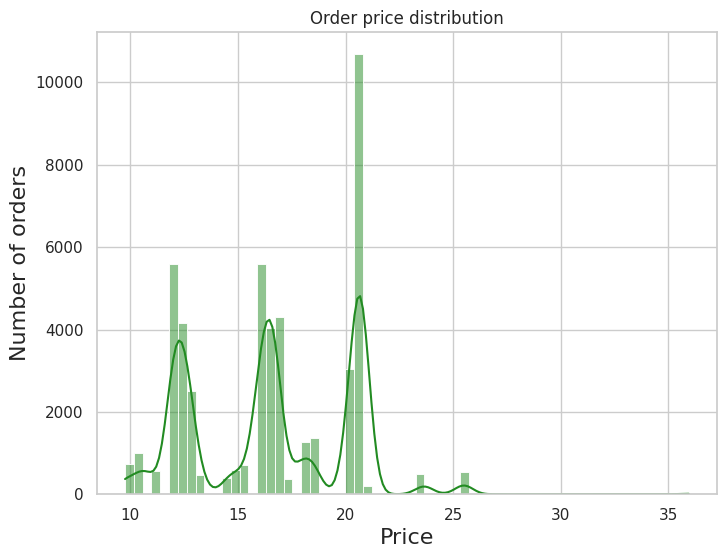

In [14]:
srednia_wartosc_zamowienia = data_merged['price'].mean()
print('Average order value: ', round(srednia_wartosc_zamowienia,2))

max_wartosc_zamowienia = data_merged['price'].max()
print('Max order value: ', round(max_wartosc_zamowienia,2))

min_wartosc_zamowienia = data_merged['price'].min()
print('Min order value: ', round(min_wartosc_zamowienia,2))

odchylenie_standardowe = data_merged['price'].std()
print('Standard deviation: ', round(odchylenie_standardowe, 2))

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(data_merged['price'], kde=True, color='forestgreen')
plt.xlabel('Price', fontsize=16)
plt.ylabel('Number of orders', fontsize=16)
plt.title('Order price distribution')

plt.show()

The standard deviation is 3.62. It is a measure of the data's spread around the mean. A higher standard deviation indicates that the data is more dispersed around the mean. A value of 3.62 suggests a moderate dispersion of order prices around their mean value.

In summary, the average order value indicates the typical price, and the standard deviation describes the degree of price variability around that mean. The minimum and maximum values indicate the price range in your data.

# On which day were the most orders placed?
# What were the top 10 days with the highest number of orders?
# What were the 10 days with the lowest number of orders?


The day with the highest number of orders:  2015-11-26 00:00:00
The top 10 days with the highest number of orders:
2015-11-26
2015-11-27
2015-10-15
2015-07-04
2015-07-03
2015-05-15
2015-10-01
2015-02-01
2015-07-24
2015-07-17
Days with zero orders:
2015-09-24
2015-09-25
2015-10-05
2015-10-12
2015-10-19
2015-10-26
2015-12-25
The top 10 days with the smallest number of orders (excluding days with zero orders):
2015-12-30
2015-03-22
2015-12-29
2015-11-22
2015-12-27
2015-09-06
2015-04-19
2015-02-22
2015-06-28
2015-08-30


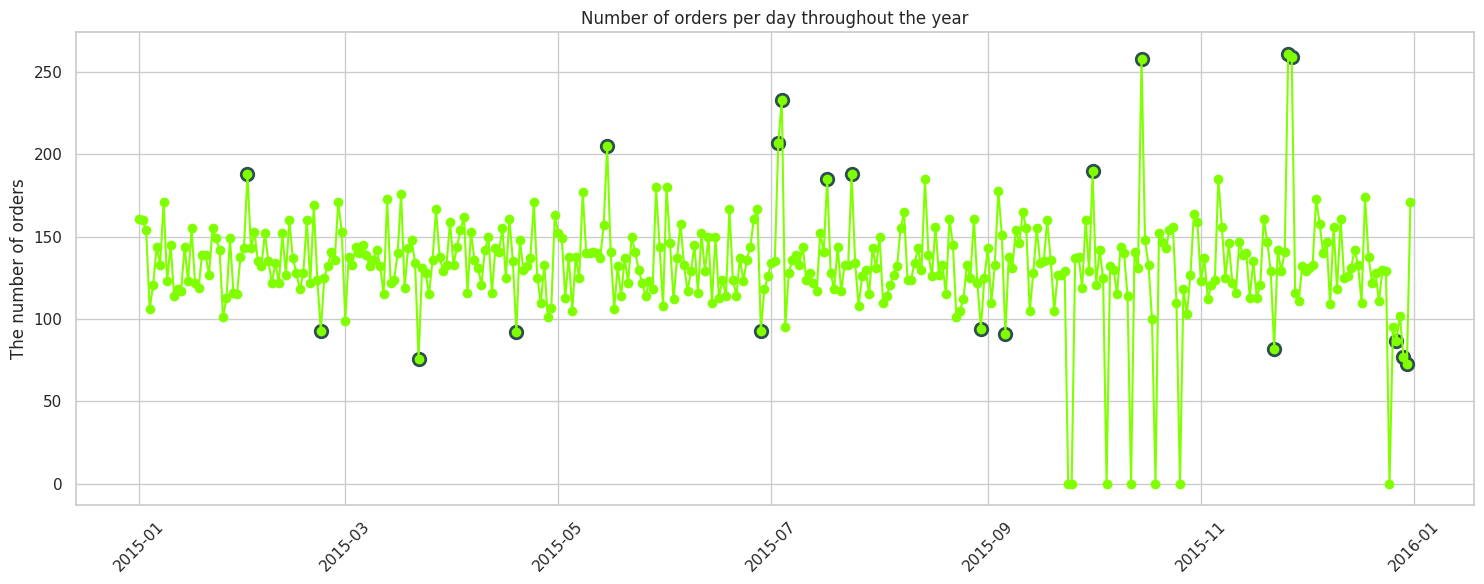

In [15]:
zamowienia_na_dzien = data_merged.groupby('date').size()
najwieksza_liczba_zamowien = zamowienia_na_dzien.idxmax()

print('The day with the highest number of orders: ', najwieksza_liczba_zamowien)

top_10_dni = zamowienia_na_dzien.nlargest(10)

top_10_dni = top_10_dni.index

print("The top 10 days with the highest number of orders:")
for date in top_10_dni:
    print(date.strftime('%Y-%m-%d'))

wszystkie_dni_w_roku = pd.date_range(start=min(data_merged['date']), end=max(data_merged['date']), freq='D')

liczba_zamowien_dnia = {day: zamowienia_na_dzien.get(day, 0) for day in wszystkie_dni_w_roku}

dni = list(liczba_zamowien_dnia.keys())
liczba_zamowien = list(liczba_zamowien_dnia.values())

plt.figure(figsize=(15, 6))
plt.plot(dni, liczba_zamowien, marker='o', linestyle='-', color='chartreuse')
plt.title('Number of orders per day throughout the year')
#plt.xlabel('Day')
plt.ylabel('The number of orders')
plt.xticks(rotation=45)
plt.grid(True)


dni_z_liczba_zamowien_zero = [day for day, liczba_zamowien in liczba_zamowien_dnia.items() if liczba_zamowien == 0]

print("Days with zero orders:")
for day in dni_z_liczba_zamowien_zero:
    formatted_day = day.strftime('%Y-%m-%d')
    print(formatted_day)


dni_zamowienia_wieksze_niz_zero = [day for day, liczba_zamowien in liczba_zamowien_dnia.items() if liczba_zamowien > 0]

liczba_zamowien_dnia_bez_zero = {day: liczba_zamowien_dnia[day] for day in dni_zamowienia_wieksze_niz_zero}

top_10_dni_najmniejsza_liczba_zamowien = sorted(liczba_zamowien_dnia_bez_zero, key=liczba_zamowien_dnia_bez_zero.get)[:10]

print("The top 10 days with the smallest number of orders (excluding days with zero orders):")
for day in top_10_dni_najmniejsza_liczba_zamowien:
    formatted_day = day.strftime('%Y-%m-%d')
    print(formatted_day)

for day in top_10_dni_najmniejsza_liczba_zamowien:
    index = dni.index(day)
    liczba_zamowien_dla_tego_dnia = liczba_zamowien[index]
    plt.scatter(day, liczba_zamowien_dla_tego_dnia, color='darkslategray', marker='o', s=100)

for day in top_10_dni:
    index = dni.index(day)
    liczba_zamowien_dla_tego_dnia = liczba_zamowien[index]
    plt.scatter(day, liczba_zamowien_dla_tego_dnia, color='darkslategray', marker='o', s=100)
plt.tight_layout()
plt.show()



# The day with the highest ORDER VALUE was:
# The 10 days with the highest order values were:
# The 10 days with the lowest order values were:

Top 10 days with the highest order value:
2015-11-27
2015-11-26
2015-10-15
2015-07-04
2015-07-03
2015-05-15
2015-02-01
2015-10-01
2015-07-17
2015-07-24
Top 10 days with the lowest order value:
2015-12-30
2015-03-22
2015-12-29
2015-11-22
2015-12-27
2015-04-19
2015-09-06
2015-08-30
2015-02-22
2015-06-28


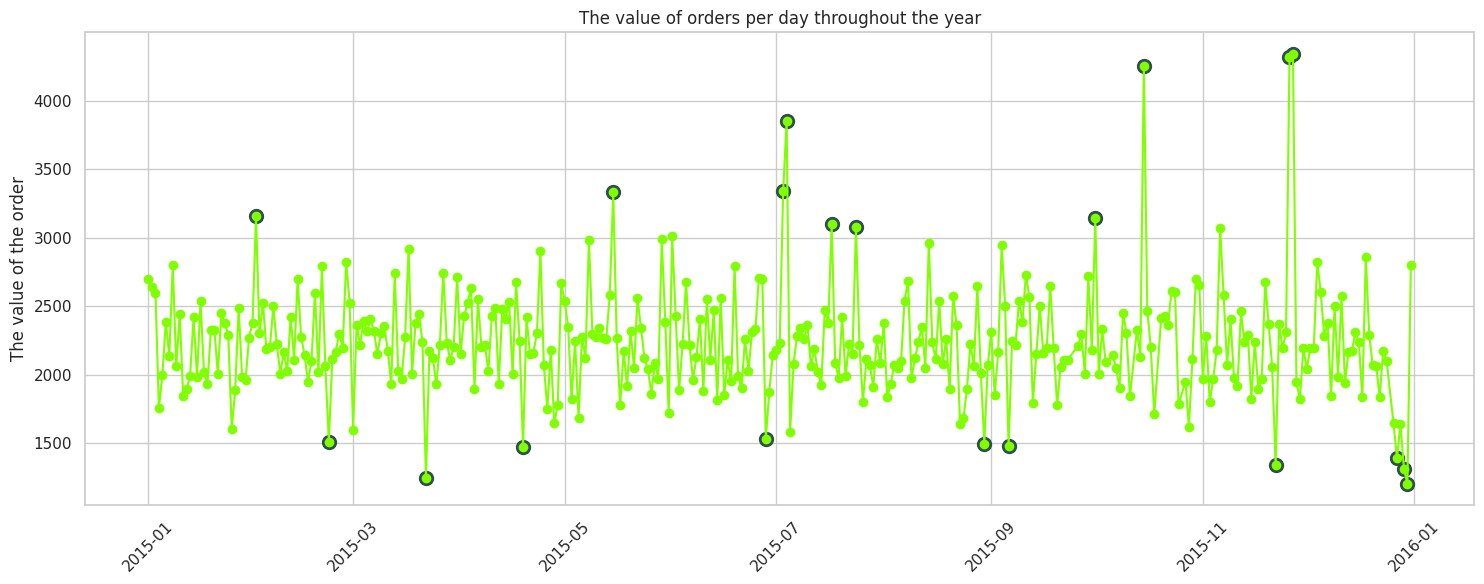

In [16]:
wartosci_zamowienia_dnia = data_merged.groupby('date')['price'].sum()

dni = wartosci_zamowienia_dnia.index
wartosci_zamowienia = wartosci_zamowienia_dnia.values

top_10_dni_najwieksza_wartosc = wartosci_zamowienia_dnia.sort_values(ascending=False).head(10)

print("Top 10 days with the highest order value:")
for date, wartosc in top_10_dni_najwieksza_wartosc.items():
    print(date.strftime('%Y-%m-%d'))

top_10_dni_najmniejsza_wartosc = wartosci_zamowienia_dnia.sort_values().head(10)

print("Top 10 days with the lowest order value:")
for date, wartosc in top_10_dni_najmniejsza_wartosc.items():
    print(date.strftime('%Y-%m-%d'))

plt.figure(figsize=(15, 6))
plt.plot(dni, wartosci_zamowienia, marker='o', linestyle='-', color='chartreuse')
plt.title('The value of orders per day throughout the year')
#plt.xlabel('Day')
plt.ylabel('The value of the order')
plt.xticks(rotation=45)
plt.grid(True)

for date, wartosc in top_10_dni_najwieksza_wartosc.items():
    if date in dni:
        index = dni.get_loc(date)
        plt.scatter(dni[index], wartosc, color='darkslategray', marker='o', s=100)

for date, wartosc in top_10_dni_najmniejsza_wartosc.items():
    if date in dni:
        index = dni.get_loc(date)
        plt.scatter(dni[index], wartosc, color='darkslategray', marker='o', s=100)

plt.tight_layout()
plt.show()


# How many pizzas were sold on weekdays? (from Monday to Thursday)
# How many pizzas were sold on weekends? (Friday, Saturday, Sunday)

In [17]:
data_merged['date'] = pd.to_datetime(data_merged['date'])

data_merged['day_of_week'] = data_merged['date'].dt.dayofweek

pizza_sold_on_weekdays = data_merged[data_merged['day_of_week'].isin([0, 1, 2, 3])]['quantity'].sum()

print("The number of pizzas sold on weekdays (from Monday to Thursday):", pizza_sold_on_weekdays)

weekend_orders = data_merged[(data_merged['day_of_week'] == 4) | (data_merged['day_of_week'] == 5) | (data_merged['day_of_week'] == 6)]

total_pizzas_sold_in_weekends = weekend_orders['quantity'].sum()

print("The number of pizzas sold on weekends (Friday, Saturday, Sunday): ", total_pizzas_sold_in_weekends)


The number of pizzas sold on weekdays (from Monday to Thursday): 27804
The number of pizzas sold on weekends (Friday, Saturday, Sunday):  21770


How many pizzas were sold on weekends in each month?

In [18]:
data_merged['month'] = data_merged['date'].dt.strftime('%Y-%m')

data_merged['is_weekend'] = data_merged['day_of_week'].isin([4, 5, 6])

monthly_weekend_pizza_counts = data_merged[data_merged['is_weekend']].groupby(['month'])['quantity'].sum().reset_index()

for index, row in monthly_weekend_pizza_counts.iterrows():
    print(f"Month: {row['month']};\nThe number of pizzas sold during the Friday to Sunday period.: {row['quantity']} \n")

Month: 2015-01;
The number of pizzas sold during the Friday to Sunday period.: 1902 

Month: 2015-02;
The number of pizzas sold during the Friday to Sunday period.: 1761 

Month: 2015-03;
The number of pizzas sold during the Friday to Sunday period.: 1760 

Month: 2015-04;
The number of pizzas sold during the Friday to Sunday period.: 1662 

Month: 2015-05;
The number of pizzas sold during the Friday to Sunday period.: 2220 

Month: 2015-06;
The number of pizzas sold during the Friday to Sunday period.: 1650 

Month: 2015-07;
The number of pizzas sold during the Friday to Sunday period.: 1957 

Month: 2015-08;
The number of pizzas sold during the Friday to Sunday period.: 1972 

Month: 2015-09;
The number of pizzas sold during the Friday to Sunday period.: 1546 

Month: 2015-10;
The number of pizzas sold during the Friday to Sunday period.: 1963 

Month: 2015-11;
The number of pizzas sold during the Friday to Sunday period.: 1853 

Month: 2015-12;
The number of pizzas sold during the F

# How many pizzas were sold on each day of the week throughout the year?

  day_of_week  quantity
0      Monday      6485
1     Tuesday      6895
2   Wednesday      6946
3   Thurstday      7478
4      Friday      8242
5    Saturday      7493
6      Sunday      6035


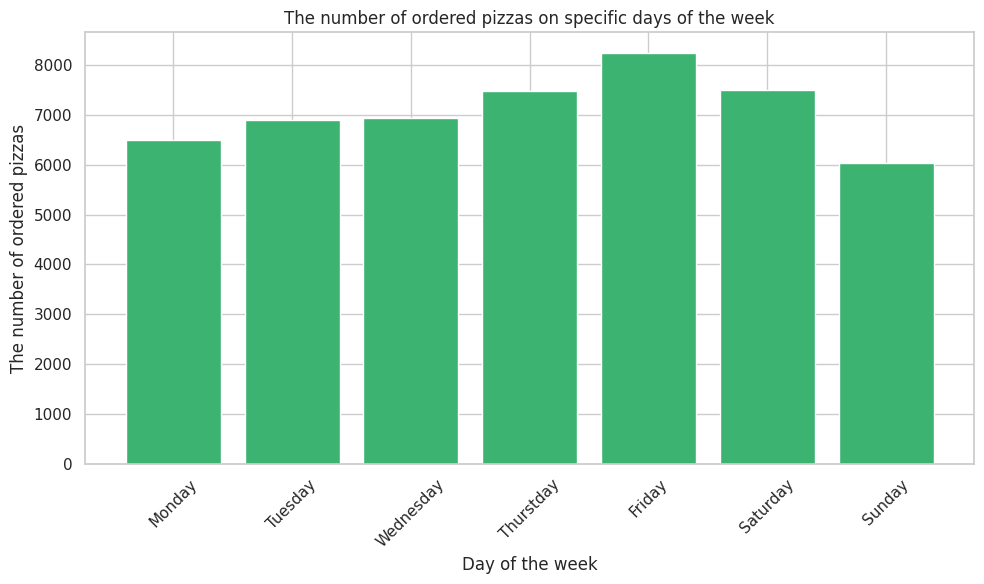

In [19]:
weekday_pizza_counts = data_merged.groupby('day_of_week')['quantity'].sum().reset_index()

weekday_pizza_counts['day_of_week'] = weekday_pizza_counts['day_of_week'].replace(
    {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thurstday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
)

print(weekday_pizza_counts)

plt.figure(figsize=(10, 6))
plt.bar(weekday_pizza_counts['day_of_week'], weekday_pizza_counts['quantity'], color='mediumseagreen')
plt.xlabel('Day of the week')
plt.ylabel('The number of ordered pizzas')
plt.title('The number of ordered pizzas on specific days of the week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Is there a correlation between the number of pizzas sold and weekends in 2015?

In [21]:
weekdays_data = data_merged[data_merged['day_of_week'].isin([0, 1, 2, 3])]['quantity']
weekends_data = data_merged[data_merged['day_of_week'].isin([4, 5, 6])]['quantity']

# Wykonanie testu t-Studenta
t_statistic, p_value = stats.ttest_ind(weekdays_data, weekends_data, equal_var=False)

print("The value of the t-statistic:", t_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("There is a significant difference in the number of ordered pizzas between weekdays and weekends")
else:
    print("There is no significant difference in the number of ordered pizzas between weekdays and weekends.")

The value of the t-statistic: 1.7641809581701773
p-value: 0.07770803853986942
There is no significant difference in the number of ordered pizzas between weekdays and weekends.


# Is there a correlation between the quantity of pizzas sold and holidays in the year 2015?


In [22]:
swieta_2015 = [pd.Timestamp('2015-01-01'),
               pd.Timestamp('2015-01-06'),
               pd.Timestamp('2015-04-05'),
               pd.Timestamp('2015-04-06'),
               pd.Timestamp('2015-05-01'),
               pd.Timestamp('2015-05-03'),
               pd.Timestamp('2015-05-24'),
               pd.Timestamp('2015-06-04'),
               pd.Timestamp('2015-08-15'),
               pd.Timestamp('2015-11-01'),
               pd.Timestamp('2015-11-11'),
               pd.Timestamp('2015-12-25'),
               pd.Timestamp('2015-12-26')]

ilosc_pizz_w_swietach = data_merged[data_merged['date'].isin(swieta_2015)]['quantity']
ilosc_pizz_w_innych_dniach = data_merged[~data_merged['date'].isin(swieta_2015)]['quantity']

t_statistic, p_value = stats.ttest_ind(ilosc_pizz_w_swietach, ilosc_pizz_w_innych_dniach, equal_var=False)

print("The value of the t-statistic:", t_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("There is a significant difference in the quantity of pizzas ordered between holidays and other days")
else:
    print("There is no significant difference in the quantity of pizzas ordered between holidays and other days")

The value of the t-statistic: -1.4507819329789564
p-value: 0.14702215687924816
There is no significant difference in the quantity of pizzas ordered between holidays and other days


# What is the average quantity of pizzas ordered per month?
# At what time were the most orders placed?
# What is the ranking of hours with the most pizza orders?

The average quantity of pizzas ordered per month:  4131.0
The most popular pizza ordering hour: 12
The number of orders placed in the most popular hour: 6776
Hour: 12, The number of ordered pizzas: 6776
Hour: 13, The number of ordered pizzas: 6413
Hour: 18, The number of ordered pizzas: 5417
Hour: 17, The number of ordered pizzas: 5211
Hour: 19, The number of ordered pizzas: 4406
Hour: 16, The number of ordered pizzas: 4239
Hour: 14, The number of ordered pizzas: 3613
Hour: 20, The number of ordered pizzas: 3534
Hour: 15, The number of ordered pizzas: 3216
Hour: 11, The number of ordered pizzas: 2728
Hour: 21, The number of ordered pizzas: 2545
Hour: 22, The number of ordered pizzas: 1386
Hour: 23, The number of ordered pizzas: 68
Hour: 10, The number of ordered pizzas: 18
Hour: 9, The number of ordered pizzas: 4


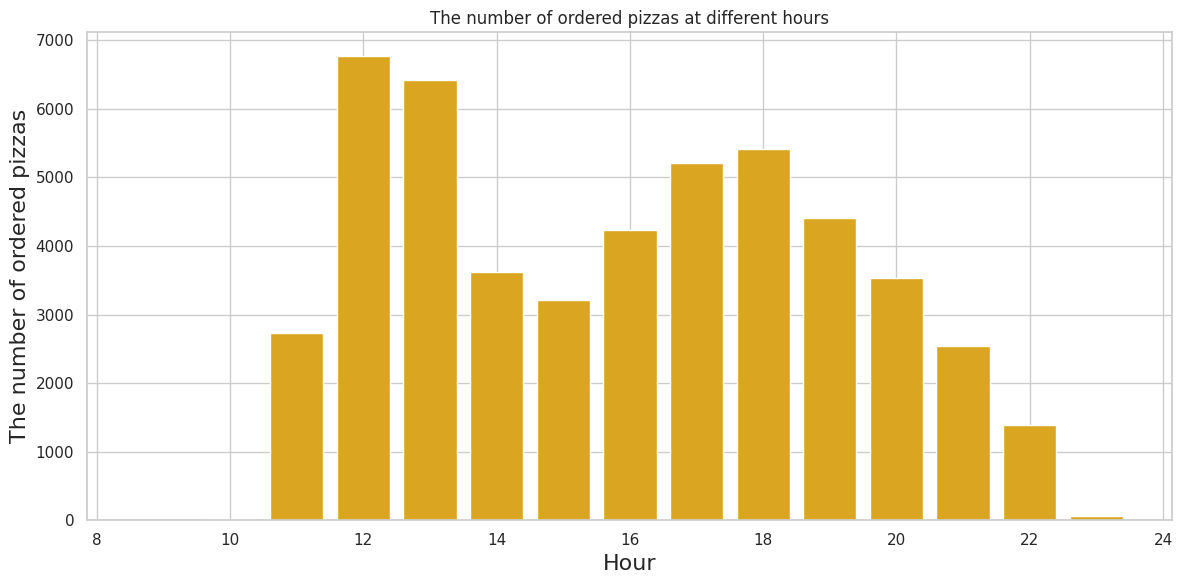

In [23]:
avg_miesiac = suma_zamowionych_pizz/12
print('The average quantity of pizzas ordered per month: ', round(avg_miesiac,0))


data_merged['time'] = pd.to_datetime(data_merged['time'])

godziny_zamowien = data_merged.groupby(data_merged['time'].dt.hour)['quantity'].sum()

najpopularniejsza_godzina = godziny_zamowien.idxmax()
ilosc_zamowien_w_najpopularniejszej_godzinie = godziny_zamowien.max()

print("The most popular pizza ordering hour:", najpopularniejsza_godzina)
print("The number of orders placed in the most popular hour:", ilosc_zamowien_w_najpopularniejszej_godzinie)

godziny_zamowien = data_merged.groupby(data_merged['time'].dt.hour)['quantity'].sum().reset_index()

godziny_zamowien = godziny_zamowien.sort_values(by='quantity', ascending=False)

for index, row in godziny_zamowien.iterrows():
    print(f"Hour: {row['time']}, The number of ordered pizzas: {row['quantity']}")

plt.figure(figsize=(12, 6))

godziny_zamowien = godziny_zamowien.sort_values(by='time', ascending=True)

plt.bar(godziny_zamowien['time'], godziny_zamowien['quantity'], color='goldenrod', capstyle='round')

plt.xlabel('Hour', fontsize=16)
plt.ylabel('The number of ordered pizzas', fontsize=16)
plt.title('The number of ordered pizzas at different hours')

plt.tight_layout()
plt.show()


# Is there a correlation between the quantity of pizzas sold and the hours?

In [25]:
godziny_zamowien = data_merged.groupby(data_merged['time'].dt.hour)['quantity'].sum()
korelacja, p_value = stats.pearsonr(godziny_zamowien.index, godziny_zamowien.values)

print(f"Correlation between hours and the quantity of ordered pizzas: {korelacja}")
print(f"P-value: {p_value}")



Correlation between hours and the quantity of ordered pizzas: -0.04066773733384861
P-value: 0.885579922893182


The correlation between hours and the quantity of ordered pizzas is -0.0407. Correlation measures the strength and direction of the relationship between two variables. In this case, the correlation is close to zero (very low), indicating a lack of a strong relationship between hours and the quantity of ordered pizzas. A correlation close to zero means that changes in ordering hours do not have a strong impact on the quantity of ordered pizzas.
The p-value is a measure of statistical significance. The value of 0.8856 is high, indicating that there is no statistically significant relationship between hours and the quantity of ordered pizzas. The p-value is large and exceeds the typical level of statistical significance (often set at 0.05 or 0.01). A high p-value suggests that the result is random, and there is no basis to reject the null hypothesis, which is the hypothesis of no relationship.

# Which pizza types generate the highest revenue?

In [146]:
data_merged['total_revenue'] = data_merged['price'] * data_merged['quantity']

total_revenue = data_merged['total_revenue'].sum()
pizza_revenue = data_merged.groupby('name')['total_revenue'].sum().reset_index()
pizza_revenue = pizza_revenue.sort_values(by='total_revenue', ascending=False)
pizza_revenue['percent_of_total'] = round((pizza_revenue['total_revenue'] / total_revenue) * 100, 2)

print(pizza_revenue.to_string(index=False))


                                      name  total_revenue  percent_of_total
                    The Thai Chicken Pizza       43434.25              5.31
                The Barbecue Chicken Pizza       42768.00              5.23
              The California Chicken Pizza       41409.50              5.06
                  The Classic Deluxe Pizza       38180.50              4.67
                   The Spicy Italian Pizza       34831.25              4.26
               The Southwest Chicken Pizza       34705.75              4.24
                 The Italian Supreme Pizza       33476.75              4.09
                        The Hawaiian Pizza       32273.25              3.95
                     The Four Cheese Pizza       32265.70              3.95
                        The Sicilian Pizza       30940.50              3.78
                       The Pepperoni Pizza       30161.75              3.69
                           The Greek Pizza       28454.10              3.48
            

# What are the most frequently ordered pizza ingredient compositions?
# What are the least frequently ordered pizza ingredient compositions?




In [147]:
ingredient_counts = data_merged.groupby('ingredients')['quantity'].sum().reset_index()

ingredient_counts = ingredient_counts.sort_values(by='quantity', ascending=False)

print("The most frequently ordered compositions are:")
print(ingredient_counts.head(10))

ingredient_counts = ingredient_counts.sort_values(by='quantity', ascending=True)

print("\nThe least frequently ordered compositions are:")
print(ingredient_counts.head(10))



The most frequently ordered compositions are:
                                          ingredients  quantity
19  Pepperoni, Mushrooms, Red Onions, Red Peppers,...      2453
1   Barbecued Chicken, Red Peppers, Green Peppers,...      2432
22           Sliced Ham, Pineapple, Mozzarella Cheese      2422
15                       Mozzarella Cheese, Pepperoni      2418
7   Chicken, Pineapple, Tomatoes, Red Peppers, Tha...      2371
6   Chicken, Artichoke, Spinach, Garlic, Jalapeno ...      2370
11  Coarse Sicilian Salami, Tomatoes, Green Olives...      1938
5   Capocollo, Tomatoes, Goat Cheese, Artichokes, ...      1924
9   Chicken, Tomatoes, Red Peppers, Red Onions, Ja...      1917
0   Bacon, Pepperoni, Italian Sausage, Chorizo Sau...      1914

The least frequently ordered compositions are:
                                          ingredients  quantity
2   Brie Carre Cheese, Prosciutto, Caramelized Oni...       490
24  Spinach, Artichokes, Kalamata Olives, Sun-drie...       934
31  ‘Nduja

# Which ingredients are most commonly used?

In [148]:
skladniki = data_merged['ingredients'].str.split(', ').sum()
counter = {}
for skladnik in skladniki:
    if skladnik in counter:
        counter[skladnik] += 1
    else:
        counter[skladnik] = 1
skladniki_posortowane = sorted(counter.items(), key=lambda x: x[1], reverse=True)

for skladnik, ilosc in skladniki_posortowane:
    print(f"Ingredient: {skladnik}, Amount: {ilosc}")

Ingredient: Garlic, Amount: 27422
Ingredient: Tomatoes, Amount: 26601
Ingredient: Red Onions, Amount: 19547
Ingredient: Red Peppers, Amount: 16284
Ingredient: Mozzarella Cheese, Amount: 10333
Ingredient: Pepperoni, Amount: 10300
Ingredient: Spinach, Amount: 10012
Ingredient: Mushrooms, Amount: 9624
Ingredient: Chicken, Amount: 8443
Ingredient: Capocollo, Amount: 6572
Ingredient: Green Olives, Amount: 6174
Ingredient: Artichokes, Amount: 5682
Ingredient: Jalapeno Peppers, Amount: 5643
Ingredient: Green Peppers, Amount: 5224
Ingredient: Feta Cheese, Amount: 4748
Ingredient: Pineapple, Amount: 4685
Ingredient: Bacon, Amount: 4227
Ingredient: Asiago Cheese, Amount: 3342
Ingredient: Corn, Amount: 3341
Ingredient: Cilantro, Amount: 3341
Ingredient: Chipotle Sauce, Amount: 3341
Ingredient: Goat Cheese, Amount: 3301
Ingredient: Kalamata Olives, Amount: 3269
Ingredient: Fontina Cheese, Amount: 3259
Ingredient: Pesto Sauce, Amount: 2893
Ingredient: Zucchini, Amount: 2485
Ingredient: Barbecued Ch